In [1]:
import pandas as pd

files = [

    'Atbasar kazakhstan 2017-11-01 to 2018-03-31.csv',
    'Atbasar kazakhstan 2018-11-01 to 2019-03-31.csv',
    'Atbasar kazakhstan 2019-11-01 to 2020-03-31.csv',
    'Atbasar kazakhstan 2020-11-01 to 2021-03-31.csv',
    'Atbasar kazakhstan 2021-11-01 to 2022-03-31.csv',
    'Atbasar kazakhstan 2022-11-01 to 2023-03-31.csv',
    'Atbasar kazakhstan 2023-11-01 to 2024-03-31.csv'
]
dataframes = [pd.read_csv(file) for file in files]

data = pd.concat(dataframes, ignore_index=True)

data.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,Atbasar kazakhstan,2017-11-01,7.2,-0.8,3.6,5.4,-3.4,1.3,1.5,86.2,...,6.6,3,NaN,2017-11-01T08:20:43,2017-11-01T17:58:45,0.40,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"35078099999,remote"
1,Atbasar kazakhstan,2017-11-02,8.4,-0.3,4.2,7.3,-1.3,3.1,1.2,81.8,...,5.9,3,NaN,2017-11-02T08:22:31,2017-11-02T17:56:56,0.44,"Rain, Overcast",Cloudy skies throughout the day with late afte...,rain,"35078099999,remote"
2,Atbasar kazakhstan,2017-11-03,3.7,-0.1,0.9,1.2,-5.3,-3.6,0.1,94.4,...,3.2,2,NaN,2017-11-03T08:24:18,2017-11-03T17:55:09,0.47,"Snow, Rain, Overcast",Cloudy skies throughout the day with afternoon...,snow,"35078099999,remote"
3,Atbasar kazakhstan,2017-11-04,0.6,-2.4,-0.6,-1.8,-7.2,-4.9,-1.7,91.9,...,4.7,3,NaN,2017-11-04T08:26:06,2017-11-04T17:53:23,0.50,"Snow, Rain, Overcast",Cloudy skies throughout the day with rain or s...,snow,"35078099999,remote"
4,Atbasar kazakhstan,2017-11-05,5.9,-1.9,2.3,2.8,-6.8,-2.0,1.2,92.5,...,1.1,1,NaN,2017-11-05T08:27:53,2017-11-05T17:51:39,0.54,"Snow, Rain, Overcast",Cloudy skies throughout the day with afternoon...,snow,"35078099999,remote"


In [2]:
low_temp = 0
dzud = []
for i in range(data.shape[0]):
    if data['tempmin'][i]<-27 and data['snowdepth'][i]>=20 and data['windspeed'][i]>=20:
        dzud.append(1)
    else:
        dzud.append(0)
data['Dzud'] = dzud
c = 0
for i in data['Dzud']:
    if i!=0:
        c+=1
c

19

In [3]:
data.dtypes

name                 object
datetime             object
tempmax             float64
tempmin             float64
temp                float64
feelslikemax        float64
feelslikemin        float64
feelslike           float64
dew                 float64
humidity            float64
precip              float64
precipprob            int64
precipcover         float64
preciptype           object
snow                float64
snowdepth           float64
windgust            float64
windspeed           float64
winddir             float64
sealevelpressure    float64
cloudcover          float64
visibility          float64
solarradiation      float64
solarenergy         float64
uvindex               int64
severerisk          float64
sunrise              object
sunset               object
moonphase           float64
conditions           object
description          object
icon                 object
stations             object
Dzud                  int64
dtype: object

In [4]:
data = data[data['tempmin'] <= -27]
data

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations,Dzud
45,Atbasar kazakhstan,2017-12-16,-15.2,-27.2,-22.9,-16.3,-36.9,-29.8,-25.3,80.7,...,2,NaN,2017-12-16T09:28:10,2017-12-16T17:16:08,0.93,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"35078099999,remote",0
65,Atbasar kazakhstan,2018-01-05,-19.2,-28.0,-24.1,-22.3,-36.6,-29.9,-27.9,70.9,...,3,NaN,2018-01-05T09:33:01,2018-01-05T17:30:59,0.61,Clear,Clear conditions throughout the day.,clear-day,"35078099999,remote",0
66,Atbasar kazakhstan,2018-01-06,-17.8,-28.9,-24.3,-19.8,-38.1,-29.8,-28.1,70.8,...,3,NaN,2018-01-06T09:32:40,2018-01-06T17:32:14,0.64,Clear,Clear conditions throughout the day.,clear-day,"35078099999,remote",0
67,Atbasar kazakhstan,2018-01-07,-17.2,-28.7,-24.0,-20.5,-37.1,-30.3,-27.8,71.1,...,3,NaN,2018-01-07T09:32:16,2018-01-07T17:33:31,0.67,Clear,Clear conditions throughout the day.,clear-day,"35078099999,remote",0
73,Atbasar kazakhstan,2018-01-13,-22.0,-27.5,-24.9,-29.2,-37.0,-32.9,-27.9,76.3,...,2,NaN,2018-01-13T09:28:43,2018-01-13T17:42:01,0.87,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"35078099999,remote",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,Atbasar kazakhstan,2024-02-20,-20.0,-33.7,-28.0,-29.0,-43.8,-37.6,-32.2,67.2,...,5,10.0,2024-02-20T08:32:45,2024-02-20T18:48:54,0.35,Clear,Clear conditions throughout the day.,clear-day,"35078099999,remote",0
1019,Atbasar kazakhstan,2024-02-21,-19.4,-32.6,-27.0,-28.6,-42.5,-37.1,-31.5,66.1,...,5,10.0,2024-02-21T08:30:42,2024-02-21T18:50:43,0.39,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"35078099999,remote",1
1020,Atbasar kazakhstan,2024-02-22,-17.6,-33.3,-26.9,-24.8,-42.9,-35.7,-31.0,68.7,...,5,10.0,2024-02-22T08:28:39,2024-02-22T18:52:33,0.42,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"35078099999,remote",0
1021,Atbasar kazakhstan,2024-02-23,-17.0,-32.8,-26.0,-22.3,-44.6,-33.9,-30.2,68.0,...,5,10.0,2024-02-23T08:26:34,2024-02-23T18:54:23,0.46,Clear,Clear conditions throughout the day.,clear-day,"35078099999,remote",0


In [5]:
data['datetime'] = pd.to_datetime(data['datetime'])
data['datetime']

<ipython-input-5-53ff569fa6de>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['datetime'] = pd.to_datetime(data['datetime'])


45     2017-12-16
65     2018-01-05
66     2018-01-06
67     2018-01-07
73     2018-01-13
          ...    
1018   2024-02-20
1019   2024-02-21
1020   2024-02-22
1021   2024-02-23
1022   2024-02-24
Name: datetime, Length: 112, dtype: datetime64[ns]

In [6]:
data = data.drop(['name', 'preciptype', 'sunrise', 'sunset', 'snow', 'conditions', 'description', 'icon', 'stations', 'severerisk', 'solarradiation',	'solarenergy',	'uvindex'], axis=1)
data

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,precipcover,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,moonphase,Dzud
45,2017-12-16,-15.2,-27.2,-22.9,-16.3,-36.9,-29.8,-25.3,80.7,0.0,...,0.0,7.7,18.0,13.0,49.0,1045.7,21.7,20.0,0.93,0
65,2018-01-05,-19.2,-28.0,-24.1,-22.3,-36.6,-29.9,-27.9,70.9,0.0,...,0.0,8.7,19.1,11.2,85.1,1040.2,0.0,20.0,0.61,0
66,2018-01-06,-17.8,-28.9,-24.3,-19.8,-38.1,-29.8,-28.1,70.8,0.0,...,0.0,8.7,16.2,10.4,84.7,1038.6,0.0,20.0,0.64,0
67,2018-01-07,-17.2,-28.7,-24.0,-20.5,-37.1,-30.3,-27.8,71.1,0.0,...,0.0,8.6,17.3,11.5,100.7,1035.7,8.7,20.0,0.67,0
73,2018-01-13,-22.0,-27.5,-24.9,-29.2,-37.0,-32.9,-27.9,76.3,0.0,...,0.0,17.6,22.7,14.4,279.7,1030.3,66.7,11.5,0.87,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2024-02-20,-20.0,-33.7,-28.0,-29.0,-43.8,-37.6,-32.2,67.2,0.0,...,0.0,78.0,35.6,15.8,90.1,1046.7,10.0,23.0,0.35,0
1019,2024-02-21,-19.4,-32.6,-27.0,-28.6,-42.5,-37.1,-31.5,66.1,0.0,...,0.0,77.9,31.0,21.6,95.7,1042.2,40.1,23.4,0.39,1
1020,2024-02-22,-17.6,-33.3,-26.9,-24.8,-42.9,-35.7,-31.0,68.7,0.0,...,0.0,77.9,20.5,14.4,76.4,1038.5,64.3,23.2,0.42,0
1021,2024-02-23,-17.0,-32.8,-26.0,-22.3,-44.6,-33.9,-30.2,68.0,0.0,...,0.0,77.7,11.2,14.4,1.8,1038.7,4.7,23.4,0.46,0


In [7]:
correlation_matrix = data.corr()

correlation_matrix

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,precipcover,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,moonphase,Dzud
datetime,1.000000,0.146178,0.031934,0.064324,0.096416,0.088760,0.049704,0.049425,-0.060636,0.002906,...,0.127820,0.496913,0.150669,-0.027182,0.143722,-0.080448,-0.031073,0.141944,-0.074406,0.198024
tempmax,0.146178,1.000000,0.582542,0.910459,0.809675,0.663898,0.832788,0.899303,0.516053,0.260873,...,0.319409,0.250775,0.181056,0.157467,0.053906,-0.452846,0.399387,-0.223465,-0.083851,0.079467
tempmin,0.031934,0.582542,1.000000,0.804247,0.486438,0.799216,0.695784,0.796921,0.472225,0.144173,...,0.097019,-0.062313,0.087726,0.066554,0.123451,-0.325388,0.258840,-0.132227,0.058840,0.094500
temp,0.064324,0.910459,0.804247,1.000000,0.724375,0.769325,0.868435,0.990049,0.578997,0.306978,...,0.319389,0.075480,0.250316,0.205904,0.083634,-0.458674,0.461118,-0.273664,-0.026430,0.132312
feelslikemax,0.096416,0.809675,0.486438,0.724375,1.000000,0.689576,0.891451,0.741955,0.565423,0.136034,...,0.156154,0.187403,-0.175525,-0.180103,0.044757,-0.319250,0.259410,-0.136524,-0.059389,-0.127887
feelslikemin,0.088760,0.663898,0.799216,0.769325,0.689576,1.000000,0.881444,0.783602,0.573214,0.017164,...,0.115844,-0.073893,-0.167923,-0.258277,0.040246,-0.233417,0.320664,-0.093409,0.015964,-0.150497
feelslike,0.049704,0.832788,0.695784,0.868435,0.891451,0.881444,1.000000,0.888040,0.668512,0.119268,...,0.217992,0.028196,-0.141262,-0.183902,0.057654,-0.359559,0.416232,-0.185695,0.002290,-0.107370
dew,0.049425,0.899303,0.796921,0.990049,0.741955,0.783602,0.888040,1.000000,0.687504,0.312597,...,0.333772,0.057522,0.220955,0.178294,0.101222,-0.476809,0.498059,-0.325828,-0.004073,0.108822
humidity,-0.060636,0.516053,0.472225,0.578997,0.565423,0.573214,0.668512,0.687504,1.000000,0.200493,...,0.266864,-0.059513,-0.029745,-0.045431,0.149018,-0.391197,0.504951,-0.463633,0.113780,-0.057297
precip,0.002906,0.260873,0.144173,0.306978,0.136034,0.017164,0.119268,0.312597,0.200493,1.000000,...,0.429617,-0.008768,0.500071,0.597153,-0.075302,-0.326407,0.282965,-0.603055,-0.184343,0.110865


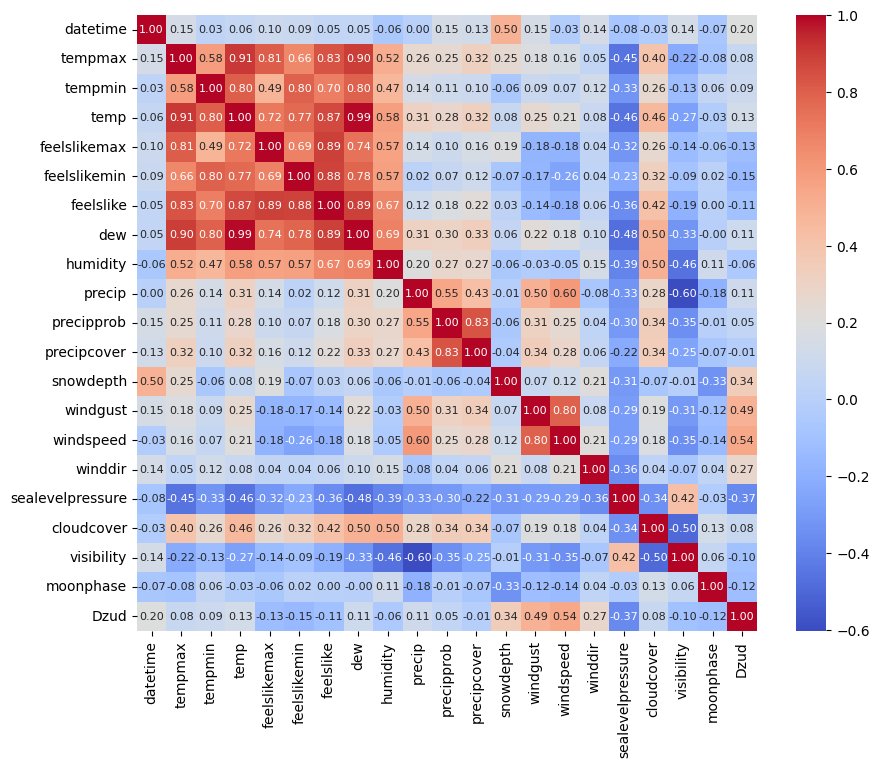

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',annot_kws={"size": 8})

plt.show()

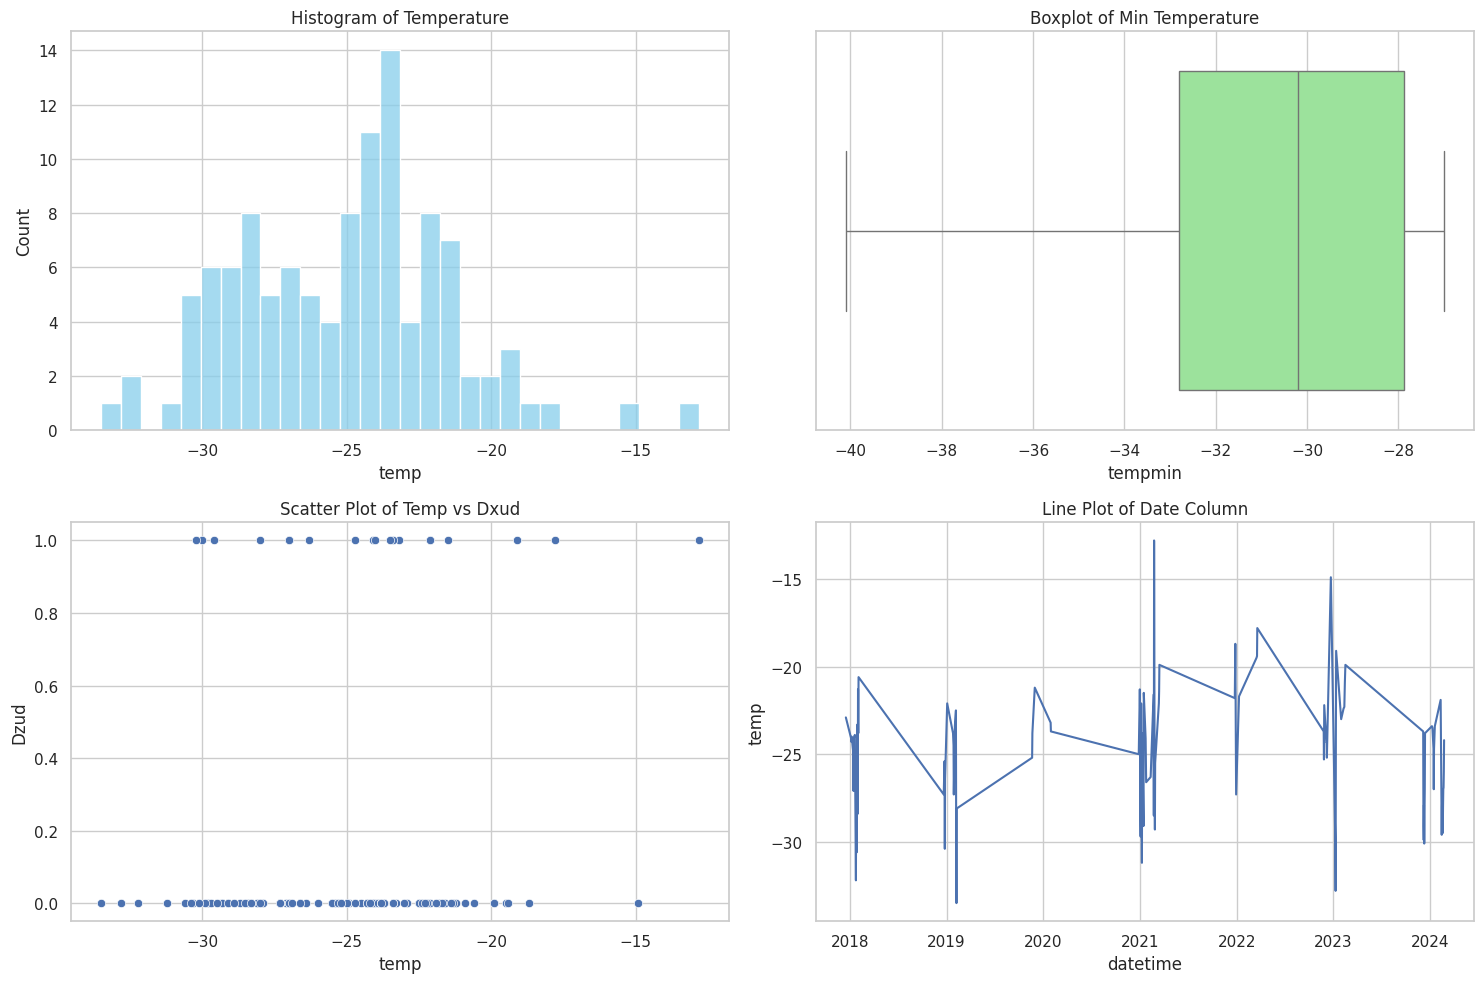

In [9]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.histplot(data['temp'], bins=30, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Histogram of Temperature')

sns.boxplot(x=data['tempmin'], ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Boxplot of Min Temperature')

sns.scatterplot(x='temp', y='Dzud', data=data, ax=axes[1, 0])
axes[1, 0].set_title('Scatter Plot of Temp vs Dxud')

data.sort_values('datetime', inplace=True)
sns.lineplot(x='datetime', y='temp', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Line Plot of Date Column')

plt.tight_layout()
plt.show()

In [10]:
data = data.dropna(axis=0)
data

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,precipcover,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,moonphase,Dzud
45,2017-12-16,-15.2,-27.2,-22.9,-16.3,-36.9,-29.8,-25.3,80.7,0.0,...,0.0,7.7,18.0,13.0,49.0,1045.7,21.7,20.0,0.93,0
65,2018-01-05,-19.2,-28.0,-24.1,-22.3,-36.6,-29.9,-27.9,70.9,0.0,...,0.0,8.7,19.1,11.2,85.1,1040.2,0.0,20.0,0.61,0
66,2018-01-06,-17.8,-28.9,-24.3,-19.8,-38.1,-29.8,-28.1,70.8,0.0,...,0.0,8.7,16.2,10.4,84.7,1038.6,0.0,20.0,0.64,0
67,2018-01-07,-17.2,-28.7,-24.0,-20.5,-37.1,-30.3,-27.8,71.1,0.0,...,0.0,8.6,17.3,11.5,100.7,1035.7,8.7,20.0,0.67,0
73,2018-01-13,-22.0,-27.5,-24.9,-29.2,-37.0,-32.9,-27.9,76.3,0.0,...,0.0,17.6,22.7,14.4,279.7,1030.3,66.7,11.5,0.87,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2024-02-20,-20.0,-33.7,-28.0,-29.0,-43.8,-37.6,-32.2,67.2,0.0,...,0.0,78.0,35.6,15.8,90.1,1046.7,10.0,23.0,0.35,0
1019,2024-02-21,-19.4,-32.6,-27.0,-28.6,-42.5,-37.1,-31.5,66.1,0.0,...,0.0,77.9,31.0,21.6,95.7,1042.2,40.1,23.4,0.39,1
1020,2024-02-22,-17.6,-33.3,-26.9,-24.8,-42.9,-35.7,-31.0,68.7,0.0,...,0.0,77.9,20.5,14.4,76.4,1038.5,64.3,23.2,0.42,0
1021,2024-02-23,-17.0,-32.8,-26.0,-22.3,-44.6,-33.9,-30.2,68.0,0.0,...,0.0,77.7,11.2,14.4,1.8,1038.7,4.7,23.4,0.46,0


In [11]:
y = data['Dzud']

X = data.drop('Dzud', axis=1)

X['datetime'] = X['datetime'].apply(lambda x: x.timestamp())

X

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,moonphase
45,1.513382e+09,-15.2,-27.2,-22.9,-16.3,-36.9,-29.8,-25.3,80.7,0.0,0,0.0,7.7,18.0,13.0,49.0,1045.7,21.7,20.0,0.93
65,1.515110e+09,-19.2,-28.0,-24.1,-22.3,-36.6,-29.9,-27.9,70.9,0.0,0,0.0,8.7,19.1,11.2,85.1,1040.2,0.0,20.0,0.61
66,1.515197e+09,-17.8,-28.9,-24.3,-19.8,-38.1,-29.8,-28.1,70.8,0.0,0,0.0,8.7,16.2,10.4,84.7,1038.6,0.0,20.0,0.64
67,1.515283e+09,-17.2,-28.7,-24.0,-20.5,-37.1,-30.3,-27.8,71.1,0.0,0,0.0,8.6,17.3,11.5,100.7,1035.7,8.7,20.0,0.67
73,1.515802e+09,-22.0,-27.5,-24.9,-29.2,-37.0,-32.9,-27.9,76.3,0.0,0,0.0,17.6,22.7,14.4,279.7,1030.3,66.7,11.5,0.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,1.708387e+09,-20.0,-33.7,-28.0,-29.0,-43.8,-37.6,-32.2,67.2,0.0,0,0.0,78.0,35.6,15.8,90.1,1046.7,10.0,23.0,0.35
1019,1.708474e+09,-19.4,-32.6,-27.0,-28.6,-42.5,-37.1,-31.5,66.1,0.0,0,0.0,77.9,31.0,21.6,95.7,1042.2,40.1,23.4,0.39
1020,1.708560e+09,-17.6,-33.3,-26.9,-24.8,-42.9,-35.7,-31.0,68.7,0.0,0,0.0,77.9,20.5,14.4,76.4,1038.5,64.3,23.2,0.42
1021,1.708646e+09,-17.0,-32.8,-26.0,-22.3,-44.6,-33.9,-30.2,68.0,0.0,0,0.0,77.7,11.2,14.4,1.8,1038.7,4.7,23.4,0.46


In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

predictions = rf_model.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Random Forest classifier: {accuracy}")

Accuracy of the Random Forest classifier: 0.9565217391304348


In [14]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

In [15]:
from sklearn.utils.class_weight import compute_class_weight

rnn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = rnn_model.fit(X_train, y_train, epochs=50, batch_size=32)

# Evaluate the model
test_loss, test_acc = rnn_model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")

Epoch 1/50
3/3 [==============================] - 5s 12ms/step - loss: 76910064.0000 - accuracy: 0.6136
Epoch 2/50
3/3 [==============================] - 0s 10ms/step - loss: 75374472.0000 - accuracy: 0.6250
Epoch 3/50
3/3 [==============================] - 0s 11ms/step - loss: 63360668.0000 - accuracy: 0.7273
Epoch 4/50
3/3 [==============================] - 0s 11ms/step - loss: 78359968.0000 - accuracy: 0.7614
Epoch 5/50
3/3 [==============================] - 0s 12ms/step - loss: 58932224.0000 - accuracy: 0.7614
Epoch 6/50
3/3 [==============================] - 0s 12ms/step - loss: 63969844.0000 - accuracy: 0.7955
Epoch 7/50
3/3 [==============================] - 0s 11ms/step - loss: 55449232.0000 - accuracy: 0.7841
Epoch 8/50
3/3 [==============================] - 0s 16ms/step - loss: 53837888.0000 - accuracy: 0.7614
Epoch 9/50
3/3 [==============================] - 0s 11ms/step - loss: 41936496.0000 - accuracy: 0.7727
Epoch 10/50
3/3 [==============================] - 0s 9ms/step -

In [16]:
fnn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

fnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = fnn_model.fit(X_train, y_train, epochs=50, batch_size=32)

test_loss, test_accuracy = fnn_model.evaluate(X_test, y_test)
print(f"Test loss: {test_loss}, Test accuracy: {test_accuracy}")

Epoch 1/50
3/3 [==============================] - 4s 14ms/step - loss: 159664576.0000 - accuracy: 0.3068
Epoch 2/50
3/3 [==============================] - 0s 9ms/step - loss: 104475216.0000 - accuracy: 0.4432
Epoch 3/50
3/3 [==============================] - 0s 9ms/step - loss: 56834100.0000 - accuracy: 0.6250
Epoch 4/50
3/3 [==============================] - 0s 11ms/step - loss: 71267504.0000 - accuracy: 0.7159
Epoch 5/50
3/3 [==============================] - 0s 12ms/step - loss: 65519080.0000 - accuracy: 0.7159
Epoch 6/50
3/3 [==============================] - 0s 16ms/step - loss: 56385220.0000 - accuracy: 0.7386
Epoch 7/50
3/3 [==============================] - 0s 15ms/step - loss: 63903772.0000 - accuracy: 0.8182
Epoch 8/50
3/3 [==============================] - 0s 17ms/step - loss: 63359960.0000 - accuracy: 0.8182
Epoch 9/50
3/3 [==============================] - 0s 9ms/step - loss: 79747064.0000 - accuracy: 0.8182
Epoch 10/50
3/3 [==============================] - 0s 9ms/step - 

In [17]:
from sklearn.base import BaseEstimator, ClassifierMixin

class KerasClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, keras_model):
        self.keras_model = keras_model

    def fit(self, X, y):
        self.keras_model.fit(X, y, epochs=10, batch_size=32)
        return self

    def predict(self, X):
        predictions = self.keras_model.predict(X)
        # Flatten the predictions to ensure they are in the right shape
        return (predictions.ravel() > 0.3).astype(int)

    def predict_proba(self, X):
        # This method should ensure the probabilities are returned correctly
        return self.keras_model.predict(X)

from sklearn.ensemble import VotingClassifier

# Assuming rnn_model, fnn_model, and rf_model are your pre-trained models
rnn_wrapper = KerasClassifierWrapper(rnn_model)
fnn_wrapper = KerasClassifierWrapper(fnn_model)

voting_clf = VotingClassifier(
    estimators=[
        ('rnn', rnn_wrapper),
        ('fnn', fnn_wrapper),
        ('rf', rf_model)  # Assuming rf_model is a sklearn-compatible classifier
    ],
    voting='hard'
)

# Fit and predict using the VotingClassifier
voting_clf.fit(X_train, y_train)
predictions = voting_clf.predict(X_test)

Epoch 1/10
3/3 [==============================] - 2s 8ms/step - loss: 11573134.0000 - accuracy: 0.6477
Epoch 2/10
3/3 [==============================] - 0s 8ms/step - loss: 7366043.5000 - accuracy: 0.7500
Epoch 3/10
3/3 [==============================] - 0s 7ms/step - loss: 6313363.0000 - accuracy: 0.7386
Epoch 4/10
3/3 [==============================] - 0s 6ms/step - loss: 5142034.0000 - accuracy: 0.7841
Epoch 5/10
3/3 [==============================] - 0s 7ms/step - loss: 6307584.0000 - accuracy: 0.7386
Epoch 6/10
3/3 [==============================] - 0s 6ms/step - loss: 6704526.5000 - accuracy: 0.6932
Epoch 7/10
3/3 [==============================] - 0s 8ms/step - loss: 10112058.0000 - accuracy: 0.6591
Epoch 8/10
3/3 [==============================] - 0s 9ms/step - loss: 6719691.0000 - accuracy: 0.7614
Epoch 9/10
3/3 [==============================] - 0s 7ms/step - loss: 8027478.0000 - accuracy: 0.6818
Epoch 10/10
3/3 [==============================] - 0s 7ms/step - loss: 6690662.0

In [18]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print("Accuracy of the VotingClassifier:", accuracy)

Accuracy of the VotingClassifier: 0.782608695652174


In [19]:
files = [
    'Atbasar kazakhstan 2024-11-01 to 2025-03-31.csv',
    'Atbasar kazakhstan 2025-11-01 to 2026-03-31.csv'
]
dataframes = [pd.read_csv(file) for file in files]

data_valid = pd.concat(dataframes, ignore_index=True)

dzud = []
for i in range(data_valid.shape[0]):
    if data_valid['tempmin'][i]<-27 and data_valid['snowdepth'][i]>=20 and data_valid['windspeed'][i]>=20:
        dzud.append(1)
    else:
        dzud.append(0)
dzud=np.array(dzud)
data_valid['datetime'] = pd.to_datetime(data_valid['datetime'])
data_valid['datetime'] = data_valid['datetime'].apply(lambda x: x.timestamp())

data_valid = data_valid.drop(['name', 'preciptype', 'sunrise','snow', 'sunset', 'conditions', 'description', 'icon', 'stations', 'severerisk', 'solarradiation',	'solarenergy',	'uvindex'], axis=1)
data_valid = data_valid.dropna()
data_valid

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,moonphase
0,1.730419e+09,5.5,-1.8,1.5,0,0,-5.6,-2.1,78.6,0.5,0.0,0,0.0,55.8,22.7,206.7,1022.0,70.1,18.0,0.00
1,1.730506e+09,4.1,-2.9,0.5,0,0,-7.4,-2.3,82.8,0.6,0.0,0,0.0,57.6,21.6,190.6,1022.7,77.9,18.1,0.02
2,1.730592e+09,2.7,-2.1,0.1,0,0,-6.4,-2.1,85.5,2.5,0.0,0,0.6,57.6,24.8,176.3,1023.2,87.2,15.4,0.06
3,1.730678e+09,2.5,-2.7,-0.4,0,0,-8.3,-2.8,84.2,2.0,0.0,0,1.0,57.6,27.7,202.9,1024.1,83.3,16.8,0.09
4,1.730765e+09,3.0,-3.0,-0.3,0,0,-8.6,-3.3,81.8,1.4,0.0,0,1.0,65.9,31.3,189.5,1023.5,78.1,18.9,0.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,1.774570e+09,-0.1,-6.6,-3.3,0,0,-12.8,-5.9,83.1,1.3,0.0,0,60.1,68.4,29.5,205.2,1020.1,61.4,17.2,0.29
298,1.774656e+09,1.4,-5.8,-2.2,0,0,-11.5,-4.7,83.7,0.8,0.0,0,59.3,65.9,31.3,195.6,1018.5,74.5,22.9,0.33
299,1.774742e+09,1.6,-5.4,-2.1,0,0,-11.6,-4.3,85.3,1.4,0.0,0,57.7,57.6,28.4,199.5,1018.2,57.7,20.9,0.36
300,1.774829e+09,1.8,-5.6,-2.0,0,0,-12.0,-4.6,83.7,0.5,0.0,0,55.9,82.8,32.0,206.6,1020.4,61.3,21.4,0.40


In [20]:
dzud_predictions = voting_clf.predict(data_valid)
dzud

9/9 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [21]:
pos_dzud = []
files = [
    'Atbasar kazakhstan 2023-11-01 to 2024-03-31.csv',
    'Atbasar kazakhstan 2024-11-01 to 2025-03-31.csv',
    'Atbasar kazakhstan 2025-11-01 to 2026-03-31.csv'
]
dataframes = [pd.read_csv(file) for file in files]

data_valid = pd.concat(dataframes, ignore_index=True)
dzud = []
for i in range(data_valid.shape[0]):
    if data_valid['tempmin'][i]<-27 and data_valid['snowdepth'][i]>=20 and data_valid['windspeed'][i]>=20:
        dzud.append(1)
    else:
        dzud.append(0)
dzud=np.array(dzud)
for i in range(len(dzud)):
  a = {
      'date': data_valid['datetime'][i],
      'temp': data_valid['tempmin'][i].astype(float),
      'snowdepht': data_valid['snowdepth'][i].astype(float),
      'isDzud': dzud[i]
  }
  pos_dzud.append(a)
pos_dzud

[{'date': '2023-11-01', 'temp': 0.7, 'snowdepht': 0.9, 'isDzud': 0},
 {'date': '2023-11-02', 'temp': 0.4, 'snowdepht': 0.7, 'isDzud': 0},
 {'date': '2023-11-03', 'temp': 4.5, 'snowdepht': 0.1, 'isDzud': 0},
 {'date': '2023-11-04', 'temp': 2.6, 'snowdepht': 0.0, 'isDzud': 0},
 {'date': '2023-11-05', 'temp': -2.1, 'snowdepht': 0.0, 'isDzud': 0},
 {'date': '2023-11-06', 'temp': -7.1, 'snowdepht': 0.0, 'isDzud': 0},
 {'date': '2023-11-07', 'temp': -6.3, 'snowdepht': 0.0, 'isDzud': 0},
 {'date': '2023-11-08', 'temp': -2.9, 'snowdepht': 0.0, 'isDzud': 0},
 {'date': '2023-11-09', 'temp': -0.9, 'snowdepht': 0.0, 'isDzud': 0},
 {'date': '2023-11-10', 'temp': 1.1, 'snowdepht': 0.0, 'isDzud': 0},
 {'date': '2023-11-11', 'temp': 2.4, 'snowdepht': 0.0, 'isDzud': 0},
 {'date': '2023-11-12', 'temp': 1.9, 'snowdepht': 0.0, 'isDzud': 0},
 {'date': '2023-11-13', 'temp': 0.7, 'snowdepht': 0.0, 'isDzud': 0},
 {'date': '2023-11-14', 'temp': 1.2, 'snowdepht': 0.0, 'isDzud': 0},
 {'date': '2023-11-15', 'temp

In [22]:
import json

for dictionary in pos_dzud:
    for key, value in dictionary.items():
        if isinstance(value, np.int64):
            dictionary[key] = int(value)

# Write JSON data to a file
with open('data.json', 'w', encoding='utf-8') as file:
    json.dump(pos_dzud, file, indent=4)

# Optionally, to verify what was written, print it out
print("JSON data written to file:")
with open('data.json', 'r', encoding='utf-8') as file:
    print(file.read())

JSON data written to file:
[
    {
        "date": "2023-11-01",
        "temp": 0.7,
        "snowdepht": 0.9,
        "isDzud": 0
    },
    {
        "date": "2023-11-02",
        "temp": 0.4,
        "snowdepht": 0.7,
        "isDzud": 0
    },
    {
        "date": "2023-11-03",
        "temp": 4.5,
        "snowdepht": 0.1,
        "isDzud": 0
    },
    {
        "date": "2023-11-04",
        "temp": 2.6,
        "snowdepht": 0.0,
        "isDzud": 0
    },
    {
        "date": "2023-11-05",
        "temp": -2.1,
        "snowdepht": 0.0,
        "isDzud": 0
    },
    {
        "date": "2023-11-06",
        "temp": -7.1,
        "snowdepht": 0.0,
        "isDzud": 0
    },
    {
        "date": "2023-11-07",
        "temp": -6.3,
        "snowdepht": 0.0,
        "isDzud": 0
    },
    {
        "date": "2023-11-08",
        "temp": -2.9,
        "snowdepht": 0.0,
        "isDzud": 0
    },
    {
        "date": "2023-11-09",
        "temp": -0.9,
        "snowdepht": 0.0,
   